In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/13OPoSocCPJEkbbL6NspkAmCLjPITbGK-25kKujqCJdw/export?gid=0&format=csv', names=['Artist(s)', 'Title', 'Google', 'Wikipedia', 'Genre'])

genres = df['Genre']
unique_genres = {}

for items in genres.iteritems():
    genre_entry = items[1]
    if genre_entry in unique_genres:
        unique_genres[genre_entry] += 1
    else:
        unique_genres[genre_entry] = 1
        
labels = list(unique_genres.keys())
values = list(unique_genres.values())
colors = ('#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#ffff99', '#6a3d9a')

## Pie Chart

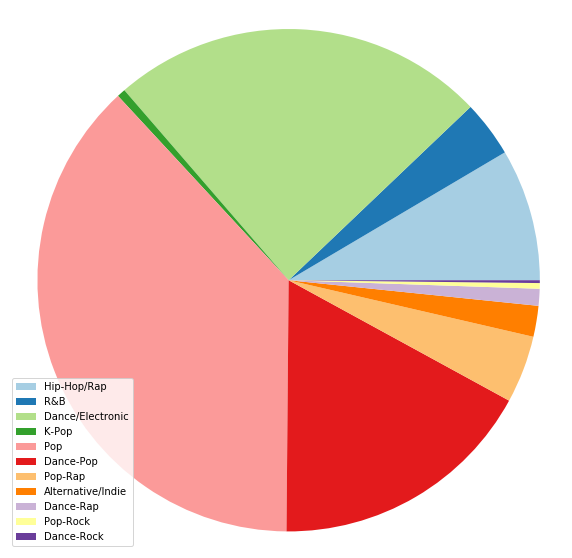

In [3]:
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(values, colors=colors)
ax.axis('equal')
ax.legend(labels, loc='best')
plt.show()

## Donut Chart

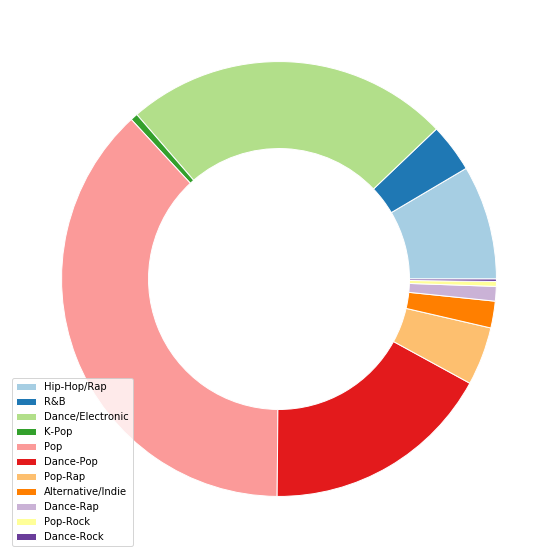

In [4]:
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(values, radius=1, colors=colors, wedgeprops=dict(width=0.4, edgecolor='w'))
ax.set(aspect="equal")
ax.legend(labels, loc='best')
plt.show()

## Horizontal Bar Chart

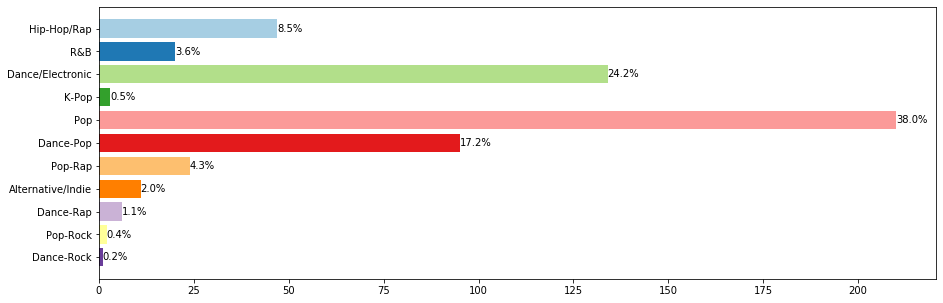

In [5]:
fig, ax = plt.subplots(figsize=(15,5))
ax.barh(np.arange(len(labels)), values, align='center', color=colors)
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.invert_yaxis()

for i, v in enumerate(values):
    ax.text(v, i, str('{:.1f}%'.format(v/sum(values)*100)), va='center')
    
plt.show()

## Stacked Bar Chart

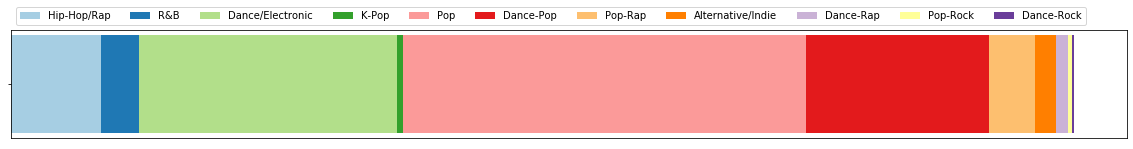

In [6]:
data = np.array(values)
data_cum = data.cumsum()

fig, ax = plt.subplots(figsize=(20, 2))
ax.invert_yaxis()
ax.xaxis.set_visible(False)

for i, (colname, color) in enumerate(zip(labels, colors)):
    width = data[i]
    start = data_cum[i] - width
    ax.barh(0, width, left=start, label=colname, color=color, tick_label='')
    
ax.legend(ncol=len(labels), bbox_to_anchor=(0, 1), loc='lower left')
plt.show()

## Line Plot

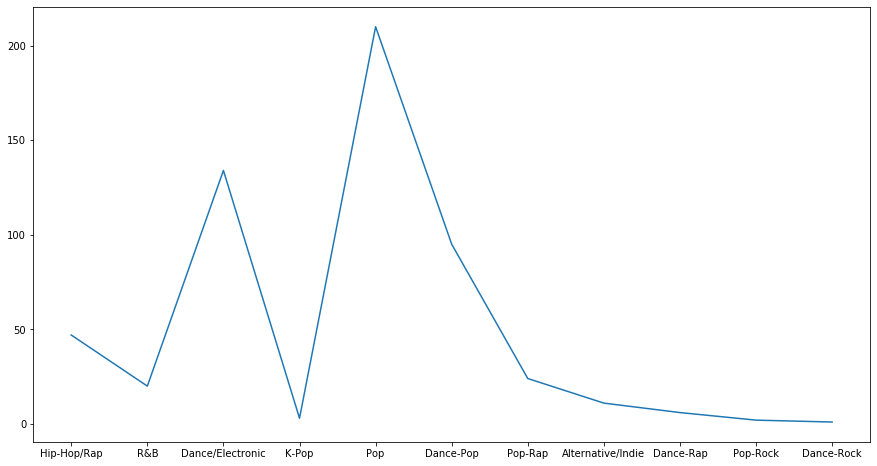

In [7]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(labels, values)
plt.show()

## Scatter Plot

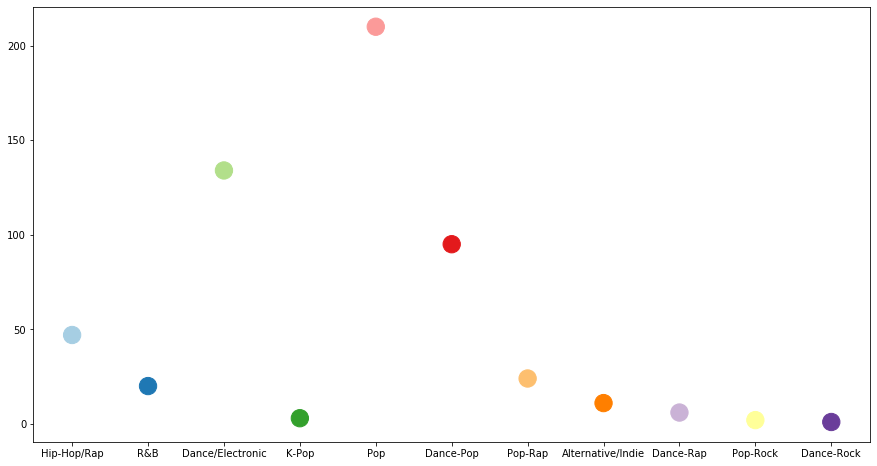

In [8]:
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(labels, values, s=300, c=colors)
plt.show()